## Файл с данными, изучение общей информации


**Введение:**<br>
В данном проекте нужно выявить определяющие закономерности успешности игр. Определить потенциально популярный продукт и спланировать рекламные кампании на будующий год.

### Знакомство с данными
Сначала импортируем библиотеки, которые могут понадобиться для выполнения проекта. Затем прочитаем файл и сохраним в переменную. Просмотрим первые десять строк файла и общую информацию в датасете и определим количество пропусков в каждом столбце.

In [1]:
# Импортируем библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math as mt
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')#Сохраняем прочитанный файл в переменную games

games.head(10)# Выводим на экран первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info() # Просматриваем информацию по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(games.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Содтадим функцию, которая принимает датафрейм и возвращает количество пропусков по каждому столбцу.

In [5]:
def nans (df):
    for col_name, row in df.items():
        print(col_name, 'количество пропусков:', row.isna().sum(), 'это {:.2%}'.format(row.isna().mean()))
        
nans(games)

Name количество пропусков: 2 это 0.01%
Platform количество пропусков: 0 это 0.00%
Year_of_Release количество пропусков: 269 это 1.61%
Genre количество пропусков: 2 это 0.01%
NA_sales количество пропусков: 0 это 0.00%
EU_sales количество пропусков: 0 это 0.00%
JP_sales количество пропусков: 0 это 0.00%
Other_sales количество пропусков: 0 это 0.00%
Critic_Score количество пропусков: 8578 это 51.32%
User_Score количество пропусков: 6701 это 40.09%
Rating количество пропусков: 6766 это 40.48%


**Вывод:**<br><br>
Таблица содржит данные о продажах игр, оценки пользователей и экспертов, жанры и платформы и состоит из 16715 строк и 11 столбцов.<br>
Столбец `Name` — название игры. Данный столбец содержит информацию о названии игры и тип данных object. В столбце 16713 значений, количество пропусков в столбце 2 это меньше 0,01%, при необходимости можно будет удалить строки с пропусками.<br>
Столбец `Platform` — платформа. Данные с названием платформы на которой была создана игра. Тип данных object. В столбце 16715 значений, а значит пропусков нет.<br>
Столбец `Year_of_Release` — год выпуска игры. Тип данных float64, что не очень корректно, можно перевести в тип данных int. В столбце 269 пропусков, это примерно 1,61%.<br>
Столбец `Genre` содержит данные о жанре игры. Тип данных object. В столбце 16713 значений, количество пропусков в столбце 2 это меньше 0,01%, можно проверить соответствуют ли эти пропуски пропускам в столбце `Name` и при необходимости можно будет удалить строки с пропусками.<br>
Столбец `NA_sales` — продажи в Северной Америке (миллионы проданных копий). Тип данных float64. В данном столбце нет пропусков, но есть нулевые значения, а значит не все игры продавались в Северной Америке либо были невостребованы. Судя по среднему значению 0.263377, медианному 0.08, и максимальному 41.36 можно сказать что Северная Америка на первом месте по количеству продаваемых копий.<br>
Столбец `EU_sales` — продажи в Европе (миллионы проданных копий). Тип данных float64. В данном столбце нет пропусков, но есть нулевые значения, среднее значение 0.145060, медианное 0.02 и максимальное 28.96.<br>
Столбец `JP_sales` — продажи в Японии (миллионы проданных копий). Тип данных float64. В данном столбце нет пропусков, есть нулевые значения. Среднее значение 0.077617, медианное 0.00 и максимальное 10.22.<br>
Столбец `Other_sales` — продажи в других странах (миллионы проданных копий). Тип данных float64. В данном столбце нет пропусков. Есть нулевые значения. Среднее значение 0.047342, медианное 0.01 и максимальное 10.57.<br>
Столбец `Critic_Score` — оценка критиков (максимум 100). Тип данных float64. Количество пропущеных значений 8578 это больше половины 51.32%. Средняя оценка критиков 68.967679, максимальная оценка 98, минимальная 13, медианное значение 71 - достаточно близкое к среднему.<br>
Столбец `User_Score` — оценка пользователей (максимум 10). Тип данных object, данный тип данных не дает производить вычесления со значениями в столбце, поэтому необходимо поменять тип данных на float64. Тип данных object может говорить о том что среди числовых значений могут быть и строковые, нужно проверить уникальные значения столбца. Так же в столбце имеются пропуски, 6701 это 40.09%.<br>
Столбец `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Тип данных object. Количество пропусков 6766 это 40.48%.<br>
Во всех названиях столбцов присутствует верхний регистр. Необходимо все названия привести к нижнему регистру.

<a id="preprocessing"> </a>
## Подготовка данных

### Замена названия столбцов

Названия всех столбцов приведем к единой форме написания (к нижнему регистру), без заглавных букв. Это позволит упростит написание кода, при обращении к столбцам и снизит вероятность допустить ошубку в написании.

In [6]:
games.columns = games.columns.str.lower() # Приводим названия столбцов к нижнему регистру
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типов данных в столбцах

Поменять тип данных в столбце `year_of_release` с float на int не дадут пропуски. Возможно удалить пропуски так как их всего 1,61%, после этого поменяем тип данных на int.<br>
Столбец `user_score` — оценка пользователей по десятибальной шкале. Необходимо поменять тип данных с object на float64, так как тип данных object не дает проводить математические вычисления и строить графики. Сначала проверим уникальные значения в столбце.

In [7]:
print('Список уникальных значений:\n', games['user_score'].unique())
print('Количество значений tbd:', games[games['user_score'] == 'tbd']['user_score'].count())

Список уникальных значений:
 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
Количество значений tbd: 2424


Изменить тип не дают строковые значения tbd. Поэтому сначала нужно поменять значения tbd на NaN, соответственно поменяется количество пропусков, а затем привести данные к типу float. Затем проверим количество значений tbd, тип данных и количество пропусков.

In [8]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce') # Меняем тип данных 'tbd' на NaN
 # Приводим данные к типу float
print('Количество значений tbd:', games[games['user_score'] == 'tbd']['user_score'].count())
print('Тип данных:', games['user_score'].dtype)
print('Количество пропусков:', games['user_score'].isna().sum(), 'это {:.2%}'.format(games['user_score'].isna().mean()))

Количество значений tbd: 0
Тип данных: float64
Количество пропусков: 9125 это 54.59%


### Рабора с пропусками

В столбцах `Name` и `Genre` одинаковое количество пропусков. Есть подозрение что это две одни и теже строки. Сначала проверим это.

In [9]:
games[games['name'].isna()]
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Да, строки очень похожи, скорее всего это данные по одной и той же игре. При наличии названия игры или жанра, данные из этих двух сторок можно было бы объеденить, но определить имя и жанр не возможно, а количество пропущеных значений меньше одного процента, поэтому просто удалим эти строки.

In [10]:
games = games.dropna(subset = ['name']) # Удаляем пропуски в обоих строках по столбцу name

Количество пропущеных значений в столбце `year_of_release` не велико, 269 значений это примерно 1.61%. Поэтому тоже удалим пропуски в этом столбце. Так же при отсутствии пропусков возможно будет изменить тип данных с float на int.

In [11]:
games = games.dropna(subset = ['year_of_release']) # Удаляем пропуски в столбце year_of_release
games['year_of_release'] = games['year_of_release'].astype('int') # Меняем тип данных с float на int.
games.info() # Проверяем изменения в датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
# Код ревьюера

df_demo = pd.DataFrame({'col_1' : [1,2,4,np.nan], 'col_2' : [10,20,40,50]}).astype({'col_1' : 'Int64', 'col_2' : 'int'})

try:
    df_demo[['col_1']].corrwith(df_demo['col_2'])
except Exception as e:
    print(repr(e))
    
df_demo = df_demo.astype({'col_1' : 'float'})

df_demo[['col_1']].corrwith(df_demo['col_2'])

AttributeError("'float' object has no attribute 'shape'")


col_1    1.0
dtype: float64

Остались пропуски в столбцах `critic_score`, `user_score` и `rating`, удалять пропуски в этих столбцах нельзя так как они составляют почти половину данных и при их удалении могут исказиться данные в других столбцах, а замена их на какие-то конкретные значения, среднее или медианное, приведет к смещению, поэтому оставим  как есть.<br>
Но с пропущеными значениями в столбце `rating` еще можно поработать. Сначала просмотрим весь список уникальных значений столбца и определим что можно с ними сделать.

In [13]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По данным википедии, категории:<br>
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. До 1996 года данная категория обозначалась как  "K-A" ("Kids to Adults") — «Для детей и взрослых». Поэтому эти обе категории можно объединить в одну «E» («Everyone») — «Для всех».<br>
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.<br>
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.<br>
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».<br>
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.<br>
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. <br>
Возможно пропущеные значения это игры с рейтингом «RP». Посмотрим список игр с отсутствующим рейтингом и рейтингом «RP».

In [14]:
display(games[games['rating'] == 'RP'])
display(games[games['rating'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Достоверно утверждать что игры с пропущеным рейтингом могут иметь рейтинг RP нельзя. Тем более что по данным сайта esrb.org игры "Duck Hunt", "Spirits & Spells" имеют рейтинг «E», а по играм "LMA Manager 2007", "Samurai Warriors: Sanada Maru" данные отсутствуют. Выяснять рейтинг каждой ига долго, поэтому данные пропуски тоже можно оставить как есть. Скорее можно ноборот рейтинг RP заменить на NaN, а рейтинги «E» и "K-A" объединить.

In [15]:
games['rating'] = games['rating'].replace('K-A', 'E')# Меняем рейтинг K-A на E
games['rating'] = games['rating'].replace('RP', np.NaN)# Меняем рейтинг RP на NaN
games['rating'].value_counts() # Проверяем количество уникальных значений

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

### Поиск дубликатов

Поищем дубликаты по столбцам `name`,`platform` и `genre`. Посмотрим на таблицу с дубликатами.

In [16]:
games[games.duplicated(subset=['name', 'platform', 'genre'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


В таблице игра "Need for Speed: Most Wanted" указана два раза в 2005 и в 2012 годах, но выходили они на разных платформах, поэтому считать их полными дубликатами нельзя. А вот игра "Madden NFL 13" указана два раза с одним годом выпуска и на одной платформе, разница в количестве проданых копий по регионам. Можно значения в столбце "eu_sales" и соответствующих  строк сложить, а строку с индексом 16230 просто удалить.

In [17]:
games.loc[604,'eu_sales'] = games.loc[604,'eu_sales'] + games.loc[16230,'eu_sales']

In [18]:
games = games.drop(index=16230)

In [19]:
display(games[games['name'] == 'Madden NFL 13']) # Проверим все строи с нованием данной игры.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


### Добавление столбца со значениями суммарных продаж во всех регионах

Создадим столбец `all_sales` и запишем в него значения суммы продаж по всем регионам (`na_sales`+`eu_sales`+`jp_sales`+`other_sales`)

In [20]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод:**<br><br>
Мы провели предобработку данных:<br>
Изменили наименование столбцов, приведя все названия к единому виду, без заглавных букв;<br>
Удалили пропуски в столбцах `name`, `genre`;<br>
Изменили тип данных в столбце `year_of_release` с float на int, в столбце `user_score` заменили абревиатуру 'tbd' на пропущеные значения NaN и поменяли тип данных с object на float;<br>
Нашли дубликаты и удалили один из них, предварительно скорректировав значения. Так же скорректировали значения в столбце `rating`;<br>
Создали новый столбец и поместили в него суммарные значения проданных копий по всем регионам.

## Исследовательский анализ данных

### Изменение количества выпуска игр с течением времени.

Проследим как росло или уменьшалось количество, выпускаемых игр каждый год. Сначала составим сводную таблицу в которой сгрупперуем данные по годам и посчитаем количество игр выпущеных в каждом году. Затем по сводной раблице составим график изменения количества игр каждый год.

In [21]:
games_on_years = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_on_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0, 0.5, 'Количество выпущенных игр в году')

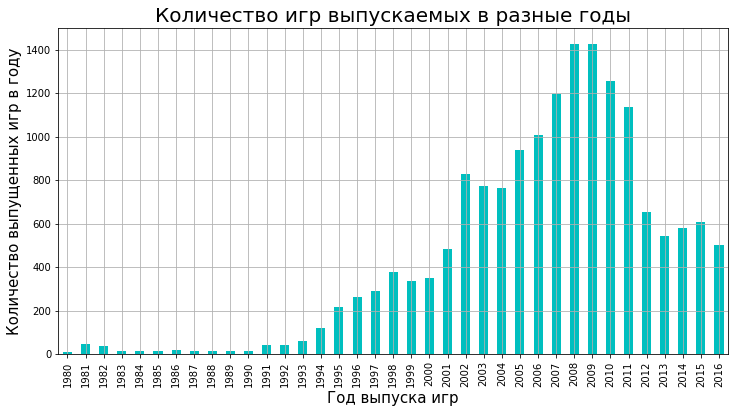

In [22]:
games_on_years.plot(
    kind='bar',
    grid=True,
    figsize=(12, 6),
    legend=(''),
    color='c',
)
plt.title('Количество игр выпускаемых в разные годы', fontsize=20)
plt.xlabel('Год выпуска игр', fontsize=15)
plt.ylabel('Количество выпущенных игр в году', fontsize=15)

**Вывод:** <br><br>
До 1994 года бало выпущено незначительное количество игр. Но с середины 90-х годов количество игр с каждым годом начало рости.<br>
Пиковые значения, по количеству выпущеных игр были в 2008 и 2009 годах, более 1400 наименований игр в год.<br>
С 2010 года началось снижение количества выпускаемых игр. Возможно это связано с появлением онлайн игр и мобильных приложений.<br>
Для анализа удобнее братьпериод с 2000 по 2016 год.

Text(0, 0.5, 'Количество выпущенных игр в году')

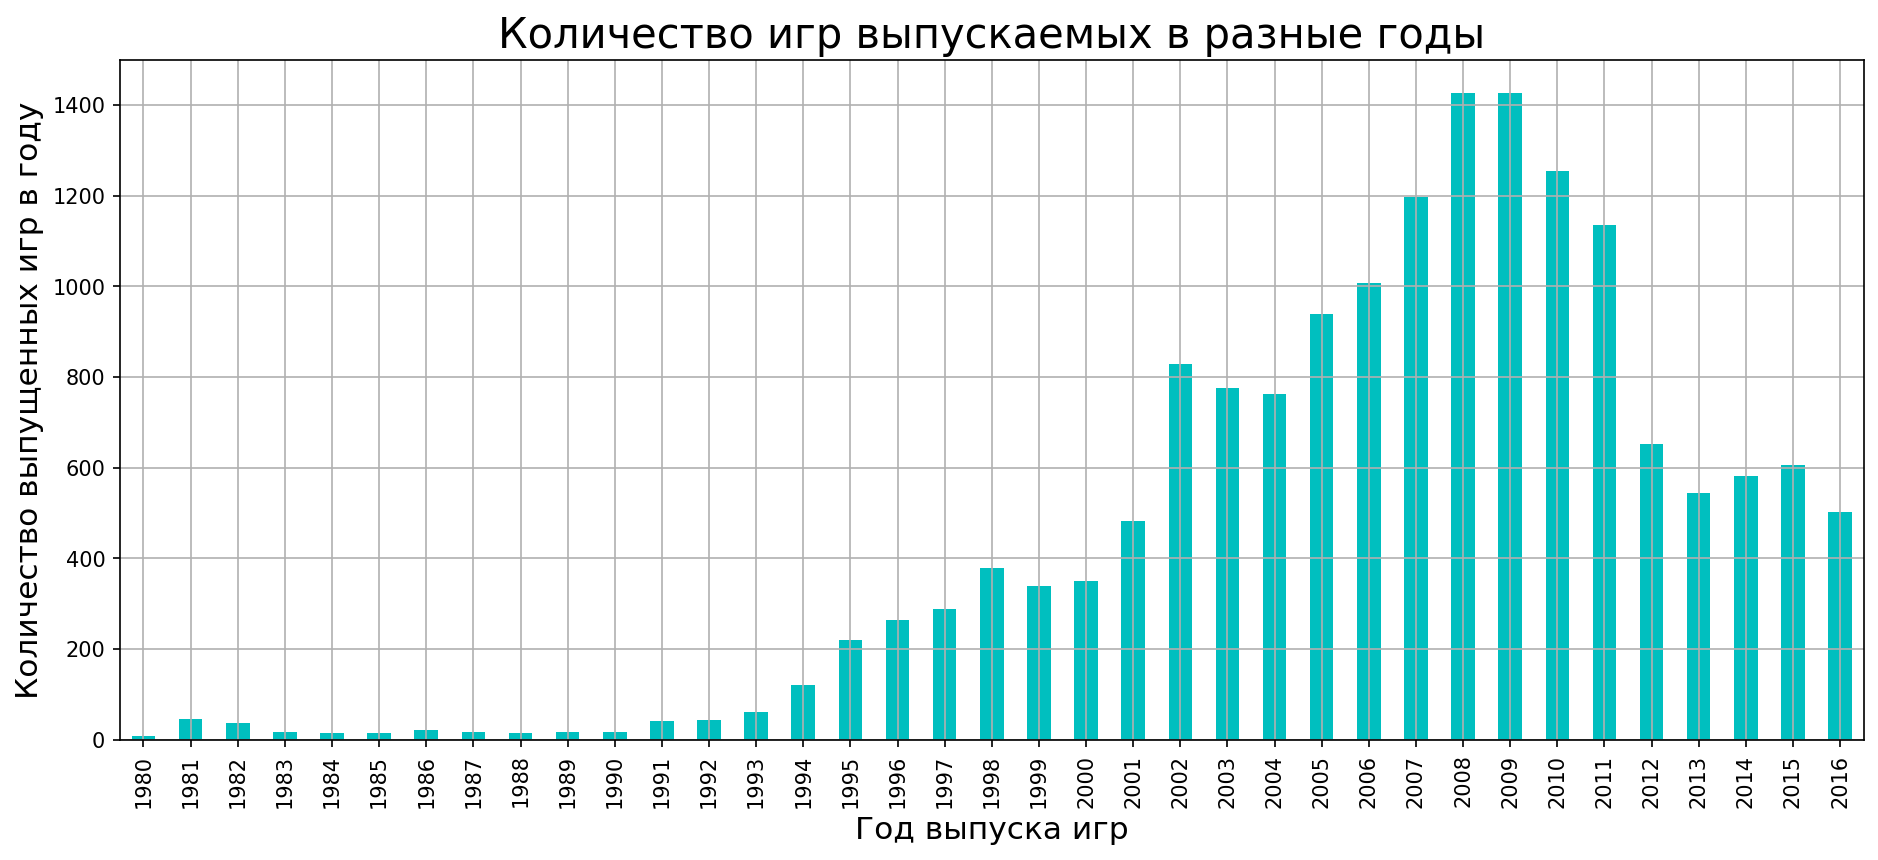

In [23]:
# Код ревьюера

fig, ax = plt.subplots(figsize=(15,6), dpi=150)

games_on_years.plot(
    kind='bar',
    grid=True,
    ax=ax,
    legend=False,
    color='c',
)
plt.title('Количество игр выпускаемых в разные годы', fontsize=20)
plt.xlabel('Год выпуска игр', fontsize=15)
plt.ylabel('Количество выпущенных игр в году', fontsize=15)

### Изменение количества продаж  игр по платформам с течением времени.

Посмотрим, как менялись продажи по платформам по годам. Затем выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
games_on_platforms = games.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales',ascending = False)
games_on_platforms

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'Количество проданых копий. млн. шт')

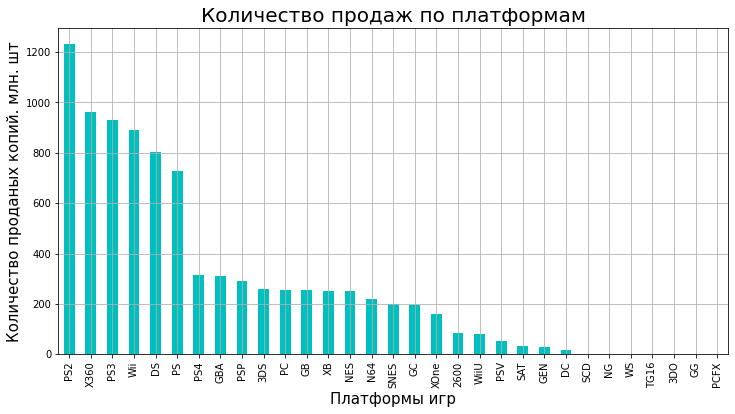

In [25]:
games_on_platforms.plot(
    kind='bar',
    grid=True,
    figsize=(12, 6),
    legend=(''),
    color='c',
)
plt.title('Количество продаж по платформам', fontsize=20)
plt.xlabel('Платформы игр', fontsize=15)
plt.ylabel('Количество проданых копий. млн. шт', fontsize=15)

Лидерами по количеству продаж по всем регионам, являются шесть платформ PS2, X360, PS3, Wii, DS, PS, это платформы с количеством продаж более 600 млн. копий.

Далее создадим список самых популярных платформ. И сделаем срез данных датафрейма по названиям платформ и годам с 2000 до 2016 года. Для отфильтрованой таблице построим графики зависимости количества продаж по каждой платформе в течении нескольких лет.

In [26]:
top6_platforms = list(games_on_platforms.reset_index().head(6)['platform'])
top6_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

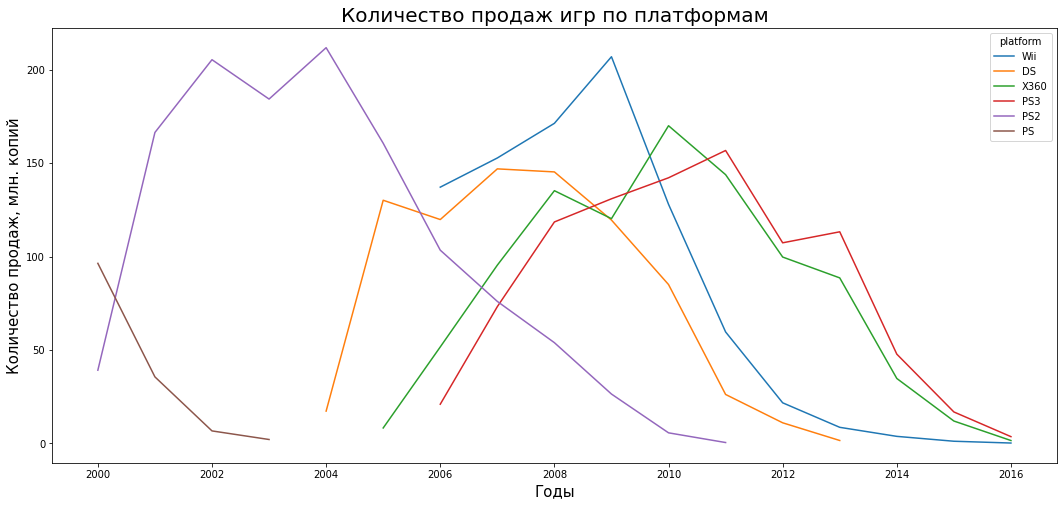

In [27]:
games_filtred = (games
 .query('platform == @top6_platforms and year_of_release >= 2000')
 )
plt.figure(figsize=(18,8))
sns.lineplot(data=games_filtred, 
             x='year_of_release',
             y='all_sales', 
             hue='platform', 
             estimator='sum',
             ci=None);

plt.title('Количество продаж игр по платформам', fontsize=20)
plt.xlabel('Годы', fontsize=15)
plt.ylabel('Количество продаж, млн. копий', fontsize=15)
plt.show()

**Вывод:** <br><br>
Судя по графикам в жизненном цикле платформы есть взлеты и падения. В среднем каждая платформа существует около 10 лет. Пиковые продажи по каждой платфоме достигаются примерно через 4 года, а затем наблюдается плавный спад продаж. <br>
На смену старым платформам приходят новые. Больше всего новых платформ появилось в промежутке с 2004 по 2006 год. 

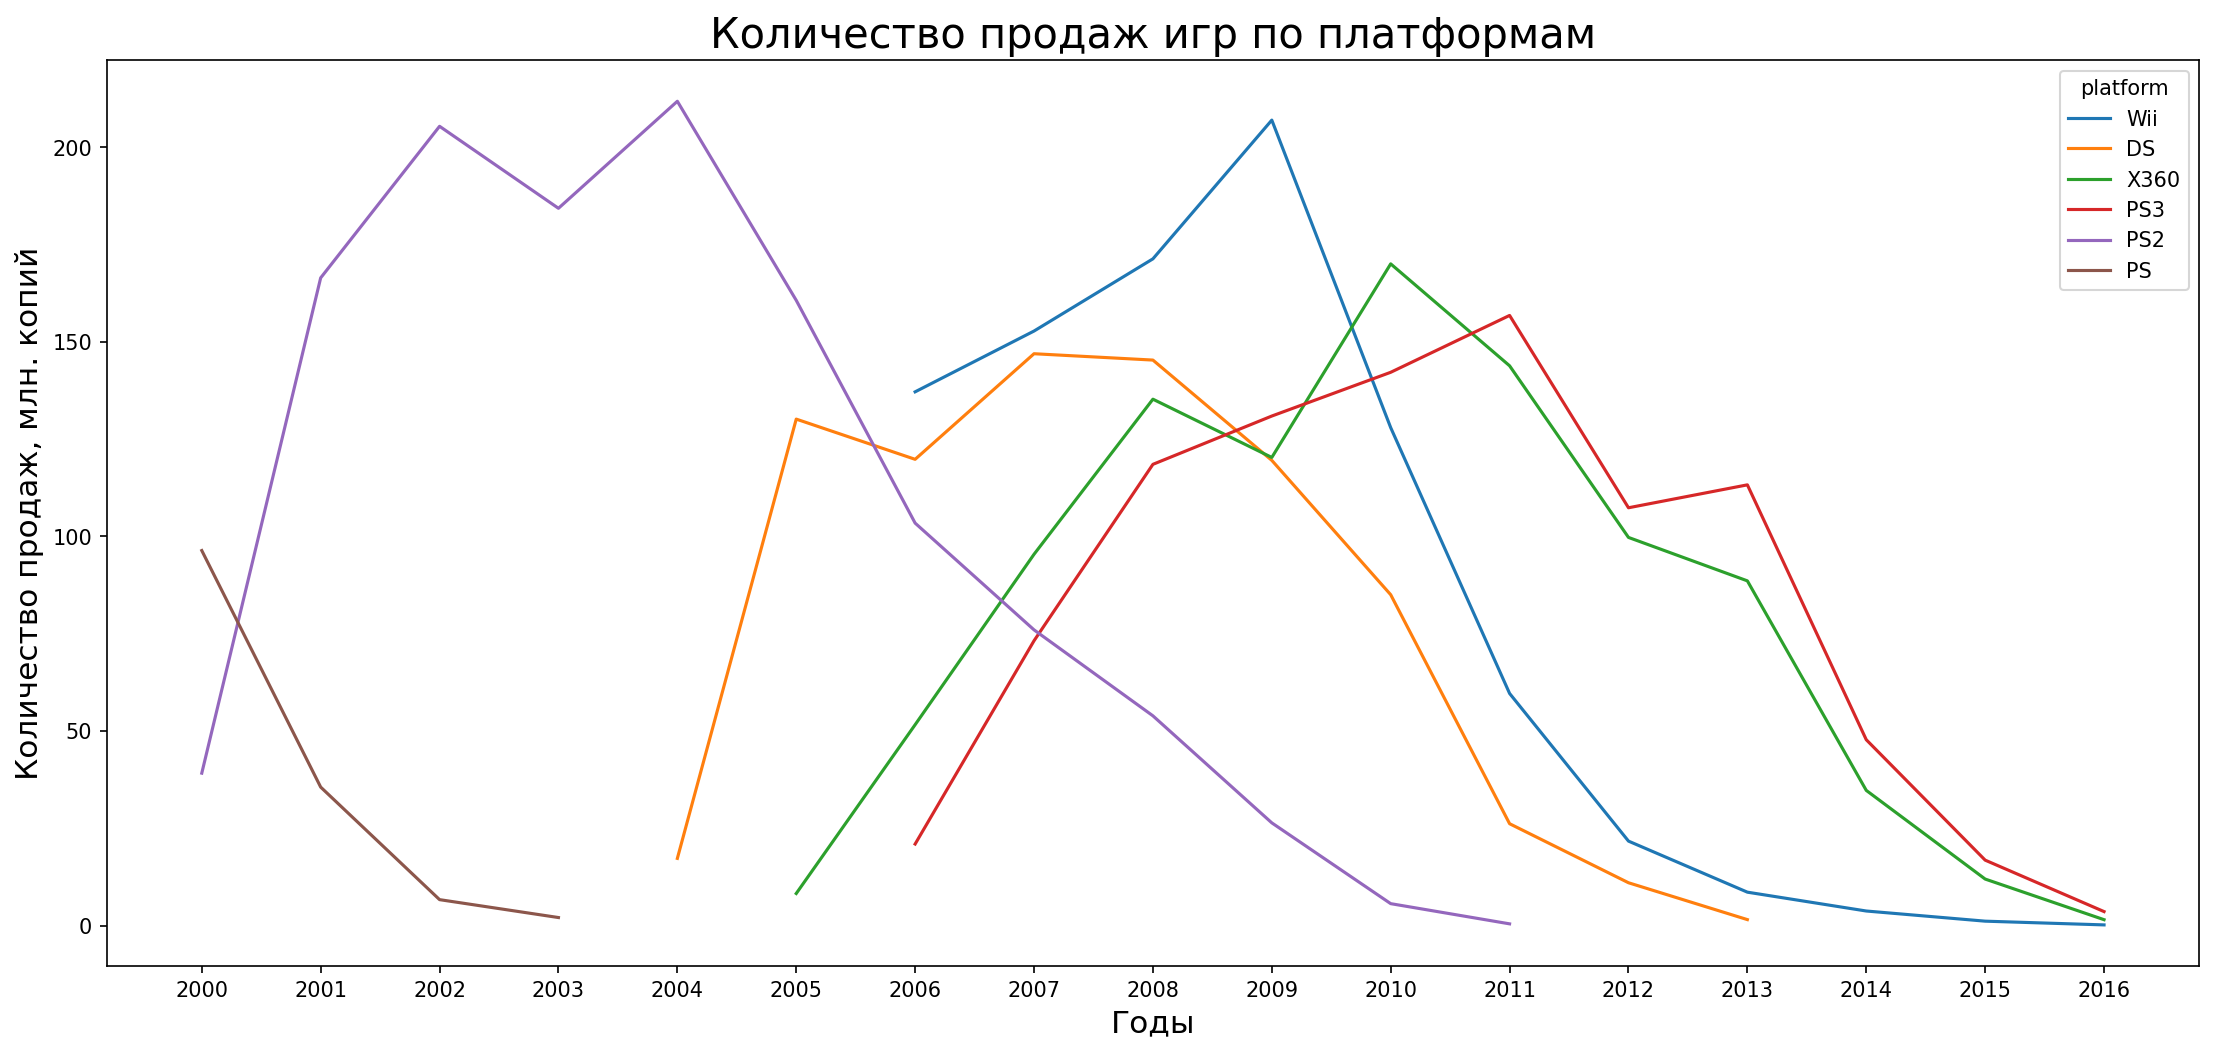

In [28]:
# Код ревьюера

import matplotlib.ticker as ticker

games_filtred = (games
 .query('platform == @top6_platforms and year_of_release >= 2000')
 )


fig, ax = plt.subplots(figsize=(18,8), dpi=150)
sns.lineplot(data=games_filtred, 
             x='year_of_release',
             y='all_sales', 
             hue='platform', 
             estimator='sum',
             ci=None);

ax.set_title('Количество продаж игр по платформам', fontsize=20)
ax.set_xlabel('Годы', fontsize=15)
ax.set_ylabel('Количество продаж, млн. копий', fontsize=15)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

### Возьмем данные за актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Ранее по графику мы определили что средний период жизни платформы это 10 лет, но так как у каждой платформы существует и подем продаж и спад, то актульный период следует определять кога продажи по платформам наиболее стабильны. Так например для платформы PS2 это был период с 2002 по 2006, у PS3 и X360 это с 2008 по 2013, т.е. актуальный срок можно считать 5 лет, в нашем случае актуальный период с 2011 по 2016 год.
Отфильтруем данные по годам (рассмотрим актуальный период) и определим платформы с мамыми .

In [29]:
# Код ревьюера

games.query('year_of_release > 2012')['year_of_release'].nunique()

4

In [30]:
# Отфильтровали данные актуального периода
games_filtred_actual = (
    games.query('year_of_release > 2012')
)
games_filtred_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Определили какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

Построим сводную таблицу для определения какие платформы лидировали по продажам в актуальный период. И построим график продаж по платформам в актуальный период. 

In [31]:
games_filtred_actual.pivot_table(index='platform', values='all_sales',
                                             aggfunc='sum', fill_value=0).sort_values(by='all_sales',ascending=False)

,all_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


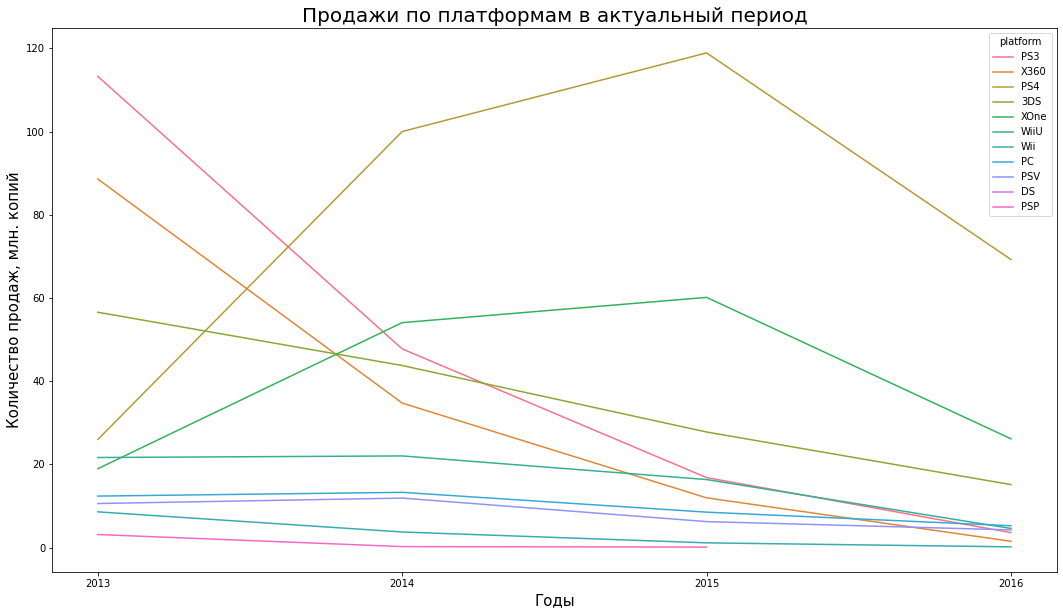

In [32]:
fig, ax = plt.subplots(figsize=(18,10))
sns.lineplot(data=games_filtred_actual, 
             x='year_of_release',
             y='all_sales', 
             hue='platform', 
             estimator = 'sum',
            ci=None);
ax.set_title('Продажи по платформам в актуальный период', fontsize=20)
ax.set_xlabel('Годы', fontsize=15)
ax.set_ylabel('Количество продаж, млн. копий', fontsize=15)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Можно чуть более различимые цвета подобрать либо тут: https://matplotlib.org/stable/tutorials/colors/colormaps.html либо собрать самому: https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html</div>    

**Вывод:**<br>
Мы определили платформы с наибольшими продажами с 2013 по 2016 год, это PS3, X360 и PS4. По всем платформам в актуальном периоде наблюдается снижение продаж, Но у платформ PS4 и XOne, с 2013 по 2015 год наблюдался рост из-за того что это новые (самые молодые) платформы в наблюдаемом периоде. Определить потенциально прибыльные платформы достаточно сложно, так как в 2016 году по всем платформам наблюдается спад продаж, но в 2017 году, платформы PS4 и XOne, по сравнению с другими платформами, продадут игр больше. Так же потенциально прибыльными могут стать новые платформы, которые появятся в 2017 году.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим "ящик с усами". отфильтровав данные за актуальный период и убрав выбросы.

Text(0, 0.5, 'Платформа')

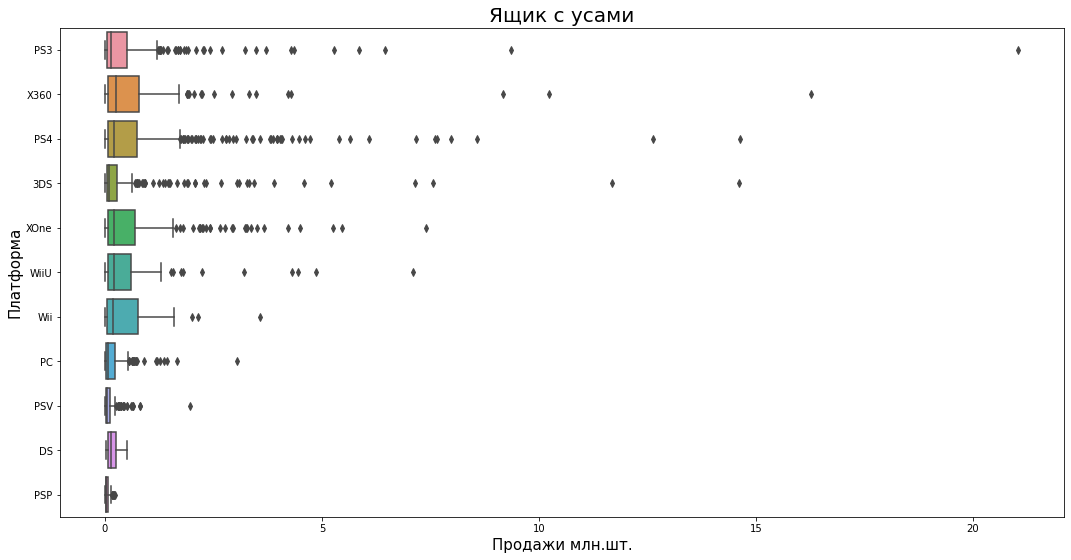

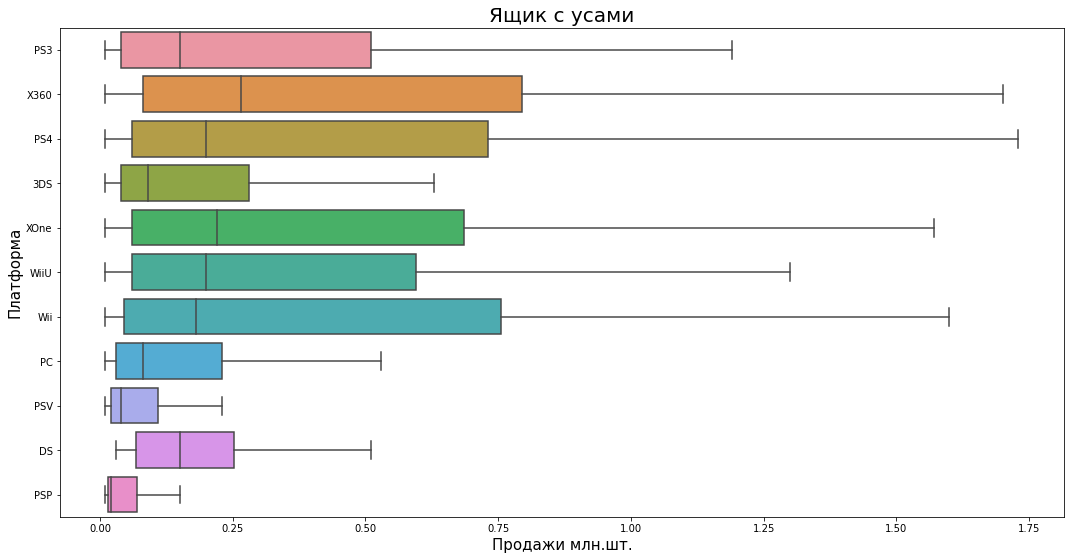

In [33]:
games_filtred_actual = (
    games.query('year_of_release > 2012')
)
plt.figure(figsize=(18,9))
sns.boxplot(data=games_filtred_actual, x='all_sales', y='platform', showfliers=True)
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Продажи млн.шт.', fontsize=15)
plt.ylabel('Платформа',fontsize=15)

games_filtred_actual = (
    games.query('year_of_release > 2012')
)
plt.figure(figsize=(18,9))
sns.boxplot(data=games_filtred_actual, x='all_sales', y='platform', showfliers=False)
plt.title('Ящик с усами', fontsize=20)
plt.xlabel('Продажи млн.шт.', fontsize=15)
plt.ylabel('Платформа',fontsize=15)

**Вывод:**<br>
Самыми продоваемыми платформами в актуальном периоде времени, являются PS4, PS3, X360, XOne, и WiiU. Их медианные значения находятся в промежутке от 0.1 до 0.2 млн. копий, а максимальные от 0.4 до 0.5 млн.

### Влияние отзывов на продажи одной популярной платформы. Построение диаграммы рассеяния и посчет корреляции между отзывами и продажами. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Рассмотрим одну из популярных платформ XOne. 
Сначала отфильтруем данные по платформе XOne и построем диаграмму рассеяния.

In [34]:
games_actual = games.query('year_of_release > 2012')
xone_filtred_actual = games_actual.query('platform == "XOne"')
xone_filtred_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


Построем диаграмму рассеяния и посчитаем корреляцию зависимости оценок критиков и продаж.

0.4169983280084017

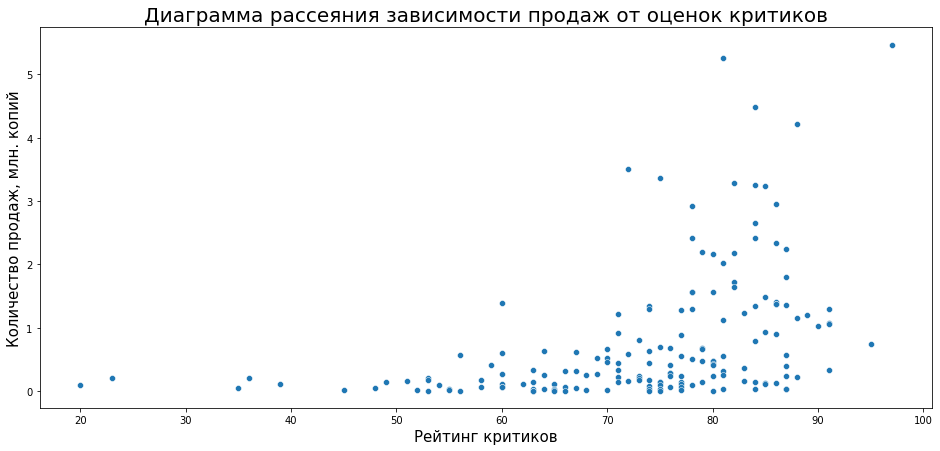

In [35]:
# Постороение диаграммы
plt.figure(figsize=(16,7))
sns.scatterplot(x=xone_filtred_actual['critic_score'],y=xone_filtred_actual['all_sales'])
plt.title('Диаграмма рассеяния зависимости продаж от оценок критиков', fontsize=20)
plt.xlabel('Рейтинг критиков',fontsize=15)
plt.ylabel('Количество продаж, млн. копий',fontsize=15)

# Подсчет корреляции
xone_filtred_actual['critic_score'].corr(xone_filtred_actual['all_sales'])

Построем диаграмму рассеяния и посчитаем корреляцию зависимости оценок пользователей и продаж.

-0.06892505328279414

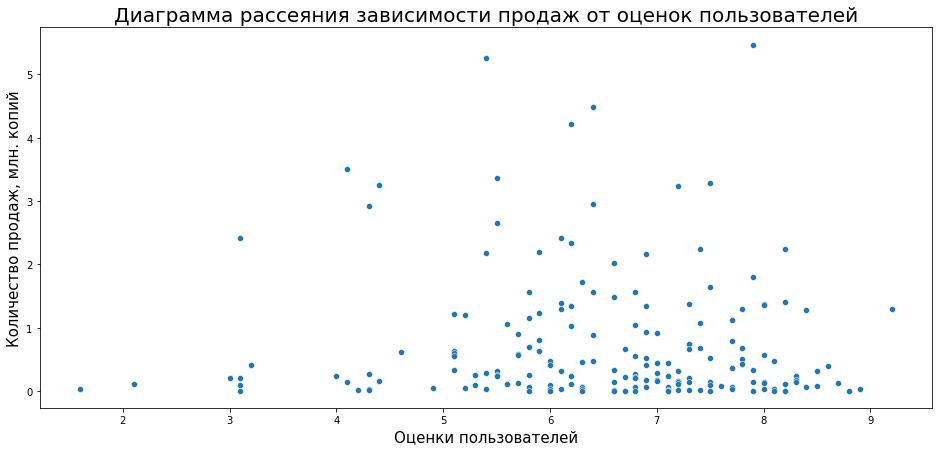

In [36]:
# Постороение диаграммы
plt.figure(figsize=(16,7))
sns.scatterplot(x=xone_filtred_actual['user_score'],y=xone_filtred_actual['all_sales'])
plt.title('Диаграмма рассеяния зависимости продаж от оценок пользователей', fontsize=20)
plt.xlabel('Оценки пользователей',fontsize=15)
plt.ylabel('Количество продаж, млн. копий',fontsize=15)
# Подсчет корреляции
xone_filtred_actual['user_score'].corr(xone_filtred_actual['all_sales'])

**Вывод:**<br>
Диаграмма рассеяния и кореляция, показывают что связь оценок критиков и количества продаж игр определенно пресутствует. 
В свою очередь связь между оценками пользователей и продажами очень мала, диаграмма более рассеяная по стравнению с предыдущей диграммой, а корреляция вседо 0.06 

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Отмечу только, что корреляция Пирсона показывает близость зависимости к линейной, а не просто наличие отсутствие зависимости. Проиллюстрировать можно так:
</div>    


<AxesSubplot:xlabel='critic_score'>

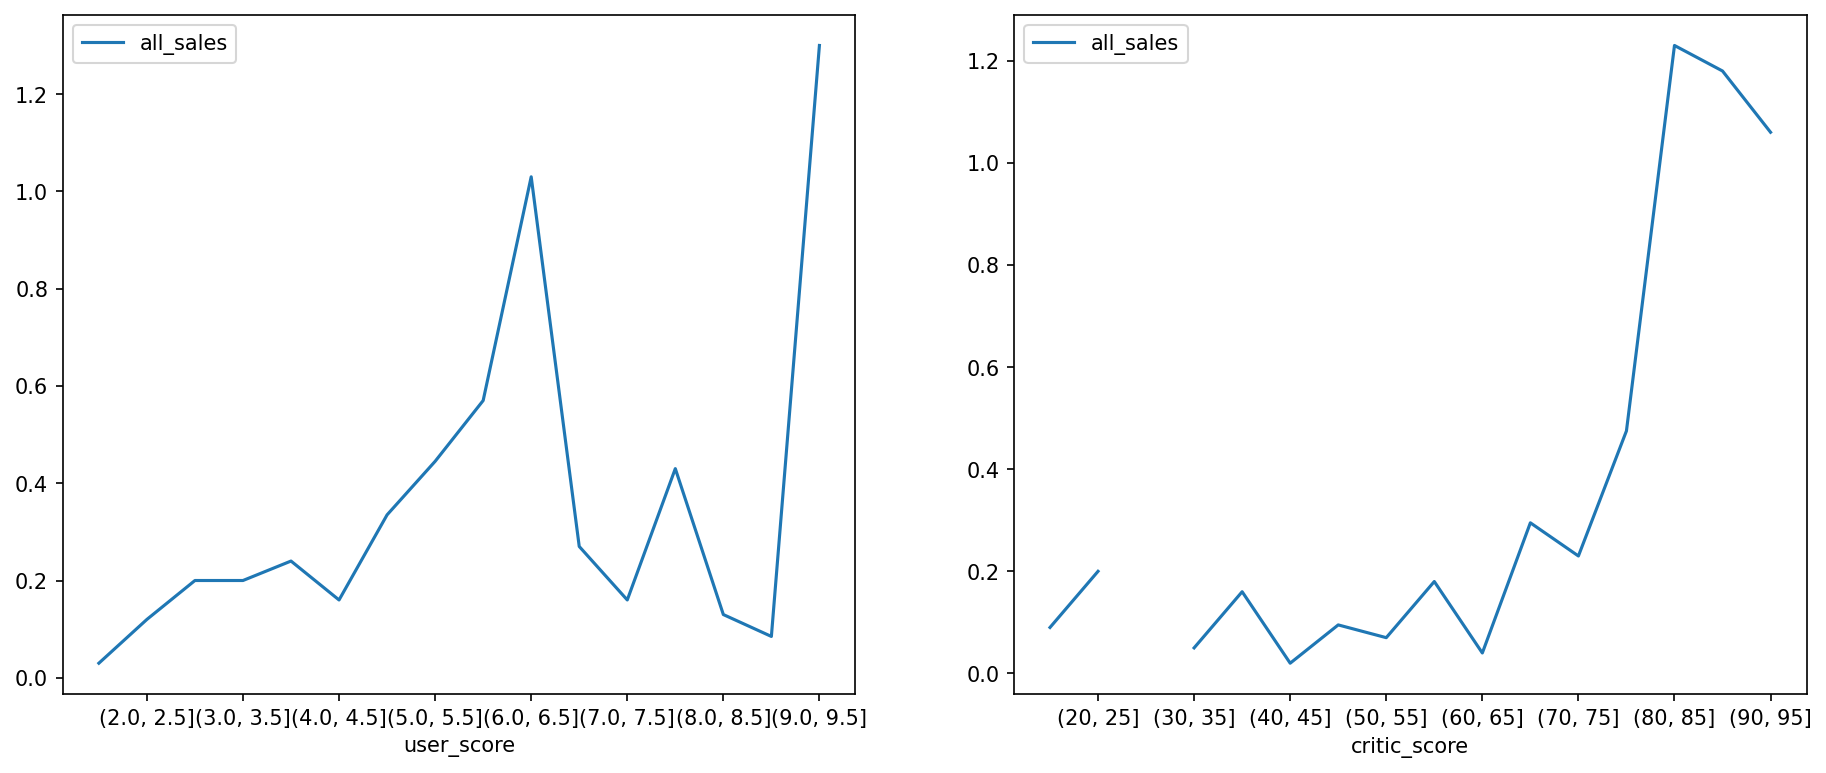

In [37]:
# Код ревтбера

fig, ax = plt.subplots(1,2,figsize=(15,6), dpi=150)

xone_filtred_actual.groupby(pd.cut(xone_filtred_actual['user_score'], bins=np.arange(0,10,0.5))).agg({'all_sales' : 'median'}).plot(ax=ax[0])
xone_filtred_actual.groupby(pd.cut(xone_filtred_actual['critic_score'], bins=np.arange(0,100,5))).agg({'all_sales' : 'median'}).plot(ax=ax[1])

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера</h3>
    
Видно, что продажи для критиков растут, а для пользователей колеблется</div>    


### Сравнение зависимостей по другим популярным платформам

Сделаем сравнение зависимостей оценок критиков и пользователей по платформе PS4. Отфильтруем таблицу по пратформе PS4, построим диаграммы и посчитаем корреляцию.

Коэффициент корреляции продаж и оценк критиков для платформы PS4: 0.407
Коэффициент корреляции продаж и оценк пользователей для платформы PS4: -0.032


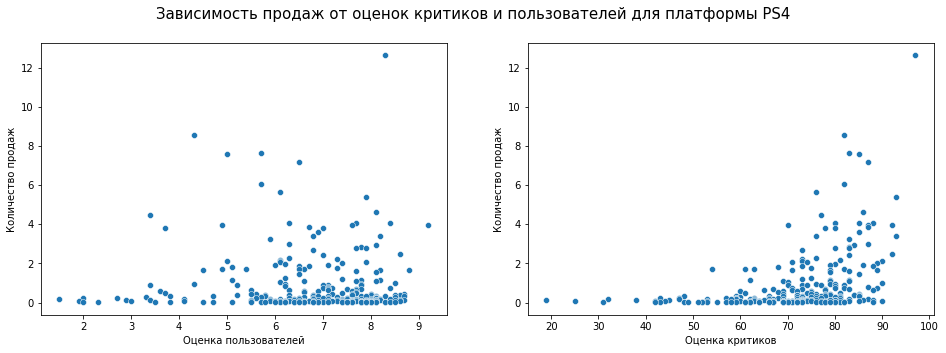

In [38]:
ps4_filtred = games_actual.query('platform == "PS4"')

fig, ax = plt.subplots(1 ,2, figsize=(16,5))
sns.scatterplot(x='user_score', y='all_sales', data=ps4_filtred, ax=ax[0])
sns.scatterplot(x='critic_score', y='all_sales', data=ps4_filtred, ax=ax[1])
fig.suptitle('Зависимость продаж от оценок критиков и пользователей для платформы PS4', fontsize=15)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')

print('Коэффициент корреляции продаж и оценк критиков для платформы PS4:', 
      round(ps4_filtred['critic_score'].corr(ps4_filtred['all_sales']),3))
print('Коэффициент корреляции продаж и оценк пользователей для платформы PS4:',
      round(ps4_filtred['user_score'].corr(ps4_filtred['all_sales']),3))

<div class="alert alert-success"; style="border-left: 7px solid green">
<h3>✔ Комментарий ревьюера V.2</h3>
    
👍 Чуть лучше может быть такое делать через `format`: https://pyformat.info/
    
</div>    


Сделаем сравнение зависимостей оценок критиков и пользователей по платформе PS3. Отфильтруем таблицу по пратформе PS3, построим диаграммы и посчитаем корреляцию.

Коэффициент корреляции продаж и оценк критиков для платформы PS3: 0.334
Коэффициент корреляции продаж и оценк пользователей для платформы PS3: 0.002


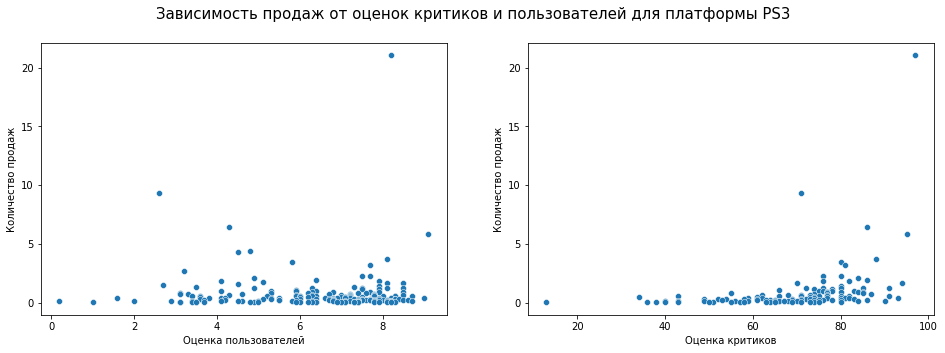

In [39]:
ps3_filtred = games_actual.query('platform == "PS3"')

fig, ax = plt.subplots(1 ,2, figsize=(16,5))
sns.scatterplot(x='user_score', y='all_sales', data=ps3_filtred, ax=ax[0])
sns.scatterplot(x='critic_score', y='all_sales', data=ps3_filtred, ax=ax[1])
fig.suptitle('Зависимость продаж от оценок критиков и пользователей для платформы PS3', fontsize=15)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')

print('Коэффициент корреляции продаж и оценк критиков для платформы PS3:', 
      round(ps3_filtred['critic_score'].corr(ps3_filtred['all_sales']),3))
print('Коэффициент корреляции продаж и оценк пользователей для платформы PS3:',
      round(ps3_filtred['user_score'].corr(ps3_filtred['all_sales']),3))

Сделаем сравнение зависимостей оценок критиков и пользователей по платформе X360. Отфильтруем таблицу по пратформе X360, построим диаграммы и посчитаем корреляцию.

Коэффициент корреляции продаж и оценк критиков для платформы X360: 0.35
Коэффициент корреляции продаж и оценк пользователей для платформы X360: -0.012


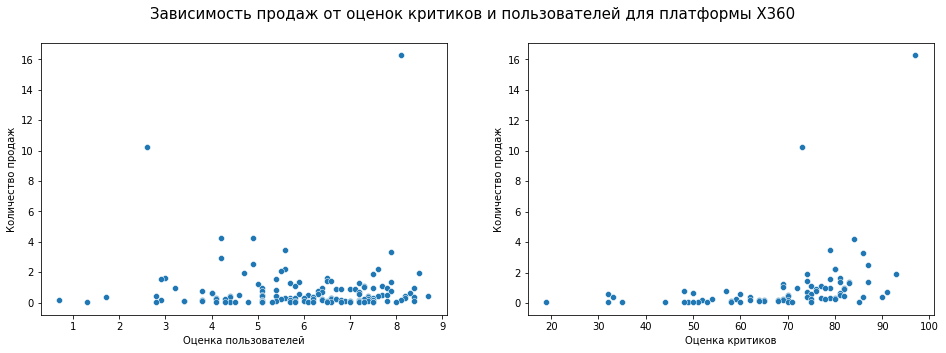

In [40]:
x360_filtred = games_actual.query('platform == "X360"')

fig, ax = plt.subplots(1 ,2, figsize=(16,5))
sns.scatterplot(x='user_score', y='all_sales', data=x360_filtred, ax=ax[0])
sns.scatterplot(x='critic_score', y='all_sales', data=x360_filtred, ax=ax[1])
fig.suptitle('Зависимость продаж от оценок критиков и пользователей для платформы X360', fontsize=15)
ax[0].set(xlabel='Оценка пользователей')
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж')
ax[1].set(ylabel='Количество продаж')

print('Коэффициент корреляции продаж и оценк критиков для платформы X360:',
      round(x360_filtred['critic_score'].corr(x360_filtred['all_sales']),3))
print('Коэффициент корреляции продаж и оценк пользователей для платформы X360:',
      round(x360_filtred['user_score'].corr(x360_filtred['all_sales']),3))

**Вывод:**<br>
По другим популярным платформам PS4, PS3, и X360 результаты схожие с результатами по платформе XOne. 
Также связь оценок критиков и количества продаж игр определенно пресутствует. А связь между оценками пользователей и продажами очень мала, об этом свидетельствуют и диаграммы и корреляция. 

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам и какие жанры самые прибыльные. Построил сводные таблицы, отсоритруем данные по жанрам игр и посчитвам количество каждого игр жанра и усмму продаж по каждому жанру.

In [41]:
genres_count_pivot = (games_actual.pivot_table(index='genre', values='name', aggfunc='count')
                       .sort_values(by='name', ascending=False).reset_index())
genres_count_pivot

,genre,name
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


Text(0, 0.5, 'Количество выпускаемых игр каждого жанра')

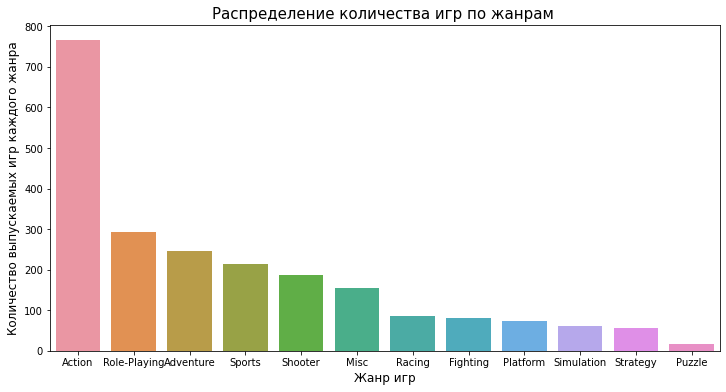

In [42]:
plt.figure(figsize=(12,6))
plt.title('Распределение количества игр по жанрам ',fontsize=15)
sns.barplot(data=genres_count_pivot, x='genre', y='name')
plt.xlabel('Жанр игр',fontsize=12)
plt.ylabel('Количество выпускаемых игр каждого жанра',fontsize=12)

In [43]:
genres_sales_pivot = (games_actual.pivot_table(index='genre', values='all_sales', aggfunc='median')
                       .sort_values(by='all_sales', ascending=False).reset_index())
genres_sales_pivot

,genre,all_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


Text(0, 0.5, 'Сумма прожаных копий каждого жанра')

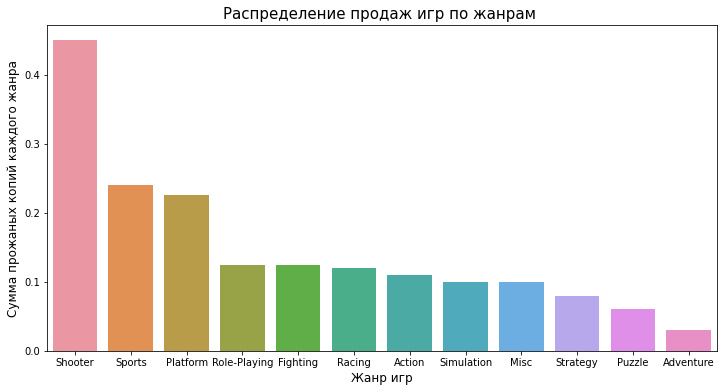

In [44]:
plt.figure(figsize=(12,6))
plt.title('Распределение продаж игр по жанрам ',fontsize=15)
sns.barplot(data=genres_sales_pivot, x='genre', y='all_sales')
plt.xlabel('Жанр игр',fontsize=12)
plt.ylabel('Сумма прожаных копий каждого жанра',fontsize=12)

**Вывод:**<br>
Распределение по количеству игр показывает что больше всего игр выпускается в жанре Action и Sports, меньше всего игр выпускается в жанре Puzzle. <br>
Самые продаваемые жанры (т.е. больше ввсего копий игр продается) так же Action и Sports, а самые наименее продаваемые жанра Strategy. <br>
Если сравнивать графики, то заметно что обы распределения схожи. Больше игр выпускается именно того жанра, которого большее количество копий продается.<br>

**Вывод:**<br><br>
Рост популярности и количество выпускаемых компьютерных игр начинается с 1994 года, и достигает своего пика к 2008 году, а с 2010 года начинается уменьшение количества выпускаемых игр.<br>
Лидерами по количеству продаж по всем регионам, были платформ PS2, X360, PS3, Wii, DS, PS.<br>
Срок жизни платформы в среднем 10 лет, своего пика популярности каждая платформа достигает через 3-5 лет, стабильный период продаж каждой платформы так же длится опимерно 5 лет. С 2011 по 2016 год по всем платформам наблюдается снижение количество продаж. Даже те, что появились новый платформы в этот промежиток времени, быстро достигают пика, а затем количество продаж снижается.<br>
Самыми популярными платформами являются PlayStation, Xbox и WiiU.<br>
По всем популярным платформам прослеживается взаимосвязь оценки критиков и количества продаж, но практически отсутствует взаимосвязь оценок пользователей и продаж.<br>
ольше игр выпускается именно того жанра, которого большее количество копий продается.<br>

## Составление портрета пользователя каждого региона

### Определение топ-5 популярных платформ, жанров и рейтигов ESRB в трех регионах.

Создадим функцию которая принимает Series, платформ, жанров и продаж в конкретном регионе, а возвращает таблицы сгруперованые по платформам и жанрам и отсортированные по убыванию суммы продаж в регионе, по каждой из платформ или жанру.<br>
#### Топ 5 платформ и жанров в Северной Америке.

<div class="alert alert-success"; style="border-left: 7px solid red">
<h3>👀 Комментарий ревьюера</h3>
    
Ниже всё здорово, можно было бы разве что черех `subplots` объединить графики на оджной горизонтали, а датафреймы вывести так: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side



In [45]:
games_actual['rating'] = games_actual.loc[:,'rating'].fillna('NNN') 
games_actual['rating'].unique()

/tmp/ipykernel_48/1733928828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_actual['rating'] = games_actual.loc[:,'rating'].fillna('NNN')


array(['M', 'NNN', 'E', 'T', 'E10+'], dtype=object)

'Топ 5 платформ по продажам в регионе:'

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


'Топ 5 жанров по продажам в регионе:'

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


'Топ 5 рейтингов по продажам в регионе:'

,rating,na_sales
0,M,165.21
1,NNN,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


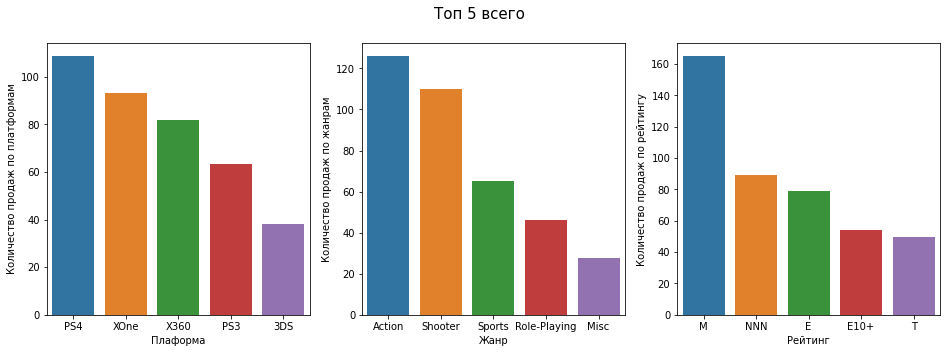

In [46]:
# Создаем функчию, которая возвращает две таблицы
def top_5(df,region):
    
    result_platforms = df.groupby('platform')[[region]].sum().sort_values(by=region, ascending=False).head().reset_index()
    result_genre = df.groupby('genre')[[region]].sum().sort_values(by=region, ascending=False).head().reset_index()
    result_rating = df.groupby('rating')[[region]].sum().sort_values(by=region, ascending=False).head().reset_index()
    display('Топ 5 платформ по продажам в регионе:', result_platforms)
    display('Топ 5 жанров по продажам в регионе:', result_genre)
    display('Топ 5 рейтингов по продажам в регионе:', result_rating)
    
# Строим графики по каждой таблице
        
    fig, ax = plt.subplots(1 ,3, figsize=(16,5))
    sns.barplot(x='platform', y=region, data=result_platforms, ax=ax[0])
    sns.barplot(x='genre', y=region, data=result_genre, ax=ax[1])
    sns.barplot(x='rating', y=region, data=result_rating, ax=ax[2])
    
    fig.suptitle('Топ 5 всего', fontsize=15)
    ax[0].set(xlabel='Плаформа')
    ax[1].set(xlabel='Жанр')
    ax[2].set(xlabel='Рейтинг')
    ax[0].set(ylabel='Количество продаж по платформам')
    ax[1].set(ylabel='Количество продаж по жанрам')
    ax[2].set(ylabel='Количество продаж по рейтингу')
    
    
top_5(games_actual,'na_sales')

#### Топ 5 платформ и жанров в Европе.

'Топ 5 платформ по продажам в регионе:'

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


'Топ 5 жанров по продажам в регионе:'

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


'Топ 5 рейтингов по продажам в регионе:'

,rating,eu_sales
0,M,145.32
1,E,83.36
2,NNN,78.91
3,E10+,42.69
4,T,41.95


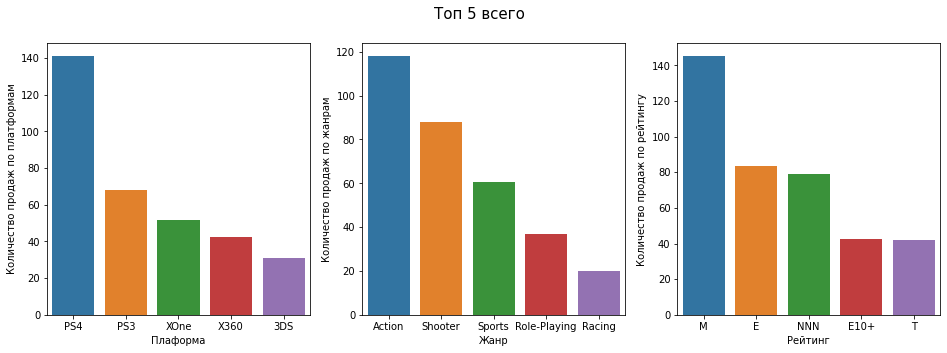

In [47]:
top_5(games_actual,'eu_sales')

#### Топ 5 платформ и жанров в Японии.

'Топ 5 платформ по продажам в регионе:'

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


'Топ 5 жанров по продажам в регионе:'

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


'Топ 5 рейтингов по продажам в регионе:'

,rating,jp_sales
0,NNN,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


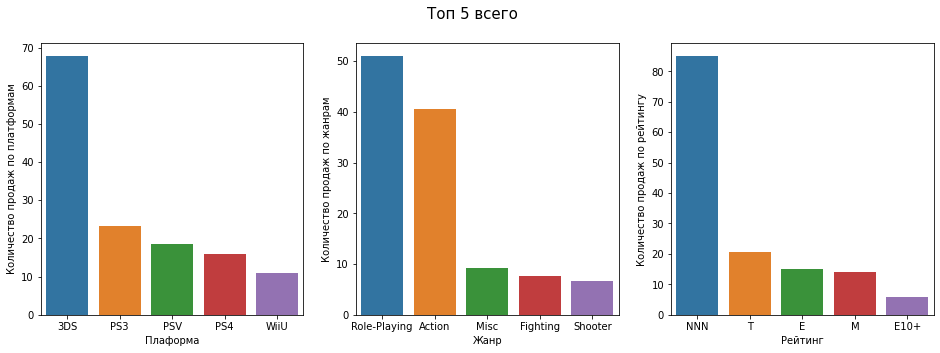

In [48]:
top_5(games_actual,'jp_sales')

**Вывод:**<br><br>
В Северной Америке самые популярные платформы X360, PS2, Wii, PS3, DS, а больше всего любят играть в игры жанров Action, Sports, Shooter, Platform, Misc.<br>
В Европе у пользователей похожие предпочтения, в топ 5 платформ так же присутствуют PS2, PS3, X360, Wii. А жанры игр даже расположились в таком же порядке, но в Европпе помимо жанров Action, Sports, Shooter еще любят гонки.<br>
В Японии пользователи предпочитают не самые попупулярные в других странах платформы, например Xbox вообще не прижился. А в жанрах игр Япоцы больше всего любят Role-Playing, ну а за ними идут жанры игр Action, Sports, Platform, Misc, жанр Shooter не любим в Японии.<br>
Из-за большого количества пропусков в столбце с рейтенгом ESRB, делать выводы о популярности той или иной возрастной группы сложно. Количество пропусков в рейтинге для игр в каждом регионе примерно одинаковое 80-95 млн. проданых копий, каждое из пропущеных значений могло быть любым значением рейтнга ESRB, а могло бы быть и каким-то конкретным значением рейтинга. Если игнорировать пропущеные значения, то судя по графикам рейтнга ESRB в Северной Америке и Европе первое место занимает группа M - для взрослых старше 17, а в Японии группа группа T - подросткам от 13. Самая широкая группа E - для всех по всем регионам стоит на втором месте. А вот в японии группа M - для взрослых старше 17 только на третьем месте. Можно сделать вывод что в Северной Америке и Европе в компьютерные игры больше играют подростки и взрослые старше 17 лет, а Японии подростки от 17 лет и сташе.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей.<br>
***Гипотеза Н0*** - Средние пользовательские рейтинги платформ Xbox One и PC равны;<br>
***Гипотеза Н1*** - Средние пользовательские рейтинги платформ Xbox One и PC не равны.<br><br>
Проведем проверку гипотезы методом scipy.stata.ttest_ind(), но сначала определим размеры двух совокупностей.

In [49]:
xone_filtred = games_actual[games_actual['platform'] == 'XOne']['user_score'].notna()
pc_filtred = games_actual[games_actual['platform'] == 'PC']['user_score'].notna()
print('Размер генеральной совокупности оценок пользователей платформы Xone:', xone_filtred.count())
print('Размер генеральной совокупности оценок пользователей платформы PC:',pc_filtred.count())
print('Средний пользовательский рейтинг игр на платформе Xone:', xone_filtred.mean())
print('Средний пользовательский рейтинг игр на платформе PC:',pc_filtred.mean())


Размер генеральной совокупности оценок пользователей платформы Xone: 247
Размер генеральной совокупности оценок пользователей платформы PC: 189
Средний пользовательский рейтинг игр на платформе Xone: 0.7368421052631579
Средний пользовательский рейтинг игр на платформе PC: 0.8201058201058201


In [50]:
xone_filtred = games_actual[games_actual['platform'] == 'XOne']['user_score']
pc_filtred = games_actual[games_actual['platform'] == 'PC']['user_score']
print('Размер генеральной совокупности оценок пользователей платформы Xone:', xone_filtred.count())
print('Размер генеральной совокупности оценок пользователей платформы PC:',pc_filtred.count())
print('Средний пользовательский рейтинг игр на платформе Xone:', xone_filtred.mean())
print('Средний пользовательский рейтинг игр на платформе PC:',pc_filtred.mean())

Размер генеральной совокупности оценок пользователей платформы Xone: 182
Размер генеральной совокупности оценок пользователей платформы PC: 155
Средний пользовательский рейтинг игр на платформе Xone: 6.521428571428572
Средний пользовательский рейтинг игр на платформе PC: 6.269677419354839


После фильтрации платформ актуального периода, размер совокупностей примерно одинаковый, equal_var=True можно не применять, но по совету укажу этот параметр.

Уровень статистической значимости зададим 5%, alpha=0.05

In [51]:
alpha = 0.05

results = st.ttest_ind(xone_filtred, pc_filtred, equal_var=True, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

Необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей.<br>
***Гипотеза Н0*** - Средние пользовательские рейтинги жанров Action и Sports равны;<br>
***Гипотеза Н1*** - Средние пользовательские рейтинги жанров Action и Sports не равны.<br><br>
Так же проверим гипотезу методом scipy.stata.ttest_ind(), но сначала определим размеры двух совокупностей.

In [52]:
action_filtred = games_actual[games_actual['genre'] == 'Action']['user_score']
sports_filtred = games_actual[games_actual['genre'] == 'Sports']['user_score']
print('Размер генеральной совокупности оценок пользователей жанров Action:', action_filtred.count())
print('Размер генеральной совокупности оценок пользователей жанров Sports:', sports_filtred.count())
print('Средний пользовательский рейтинг игр в жанре Action:', action_filtred.mean())
print('Средний пользовательский рейтинг игр в жанре Sports:', sports_filtred.mean())

Размер генеральной совокупности оценок пользователей жанров Action: 389
Размер генеральной совокупности оценок пользователей жанров Sports: 160
Средний пользовательский рейтинг игр в жанре Action: 6.837532133676093
Средний пользовательский рейтинг игр в жанре Sports: 5.238124999999999


Размер совокупностей разный, поэтому equal_var=True.<br>
Уровень статистической значимости зададим 5%, alpha=0.05

In [53]:
alpha = 0.05

results = st.ttest_ind(action_filtred, sports_filtred, equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700703482e-20
Отвергаем нулевую гипотезу


**Вывод**<br>
Проверку гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Мы не смогли опровергнуть нулевую гипотезу, а значит средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковые.<br>
2. Средние пользовательские рейтинги жанров Action и Sports разные.<br>
Мы отвергли нулевую гипотезу о том что совокупности могут быть равны, а значит средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод:

В данном проекте мы проанализировали данные о компьютерных играх, которые продавались по всему миру начинапая с 1980 года по 2016 год. 
1. Мы просмотрели информацию по всем данным и определили что в датафрейме присутствуют пропущенные значения, названия колонок указаны не коретно и есть дубликаты, также некотороые данные имели не верный тип.
2. Перед началом анализа мы подготовили данные, удалили пропуски, которые не влияли на конечный результат, поменяли типы данных, там где это было необходимо, названия столбцов датафрейма привели к однообразному написанию. Так же удалили дубликаты и добавили столбец с сумарными продажами игр по всему миру.
3. Провели статистический анализ данных. Просмотрели количество выпускаемых игр по годам и выяснили большое количество игр начали выпускать с 1994 года, а пик популярности приходился на 2008, 2009 года. Просмотрели количество продаж по игровым платформам и определили что лидерами по количеству продаж по всем регионам, являются шесть платформ PS2, X360, PS3, Wii, DS, PS, это платформы с количеством продаж более 600 млн. копий. Так же определили что средний срок жизни популярных платформ 10 лет, а количество продаж по всем платфомам к 2016 году заметно снижается и даже новые платформы которые появилсть в промежутке между 2011 и 2016 годами уже не пользуются такой популярностью как платформы предыдущего поколения. Еще определили присутствие всаимосвязи оценок игровых критиков и продаж компютерных игр и отсутствие взаимосвязи оценок пользователей с продажами. Рассмотрели распределение компьютерных игр по жанрам и прешли к выводу что какие жаноры больше всего продаются, тех жанров больше и выпускают.
4. Из-за большого количества пропусков в столбце с рейтенгом ESRB, делать выводы о популярности той или иной возрастной группы сложно. Количество пропусков в рейтинге для игр в каждом регионе примерно одинаковое 80-95 млн. проданых копий, каждое из пропущеных значений могло быть любым значением рейтнга ESRB, а могло бы быть и каким-то конкретным значением рейтинга.

5. Подтвердили гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковые. И Подтвердили гипотезу о том что средние пользовательские рейтинги жанров Action и Sports разные.